In [53]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import 'numpy' and 'pandas' for working with numbers and data frames
import numpy as np
import pandas as pd

# Import 'pyplot' from 'matplotlib' and 'seaborn' for visualizations
from matplotlib import pyplot as plt
import seaborn as sns

# Import method for regression from 'statsmodels'
import statsmodels.formula.api as smf

# Import method for regression from 'sklearn'
from sklearn.linear_model import LinearRegression

# Import 'train_test_split' from 'sklearn' for train-validation-test split
from sklearn.model_selection import train_test_split

# Import 'mean_squared_error' from 'sklearn' for error computations
from sklearn.metrics import mean_squared_error

# Import the min-max scaled from 'sklearn'
from sklearn.preprocessing import MinMaxScaler

# Import the ridge and LASSO regression models from 'sklearn'
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# Import method to compute VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
from google.colab import files
uploaded = files.upload()

Saving telecom_churn_data.csv to telecom_churn_data.csv


In [54]:
import io
df = pd.read_csv(io.BytesIO(uploaded['telecom_churn_data.csv']))
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [55]:
# Understand the shape of the data
df.shape

(99999, 226)

In [56]:
# Take a look at the features in the data
df.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [57]:
# Calculate the 70th percentile of recharge amounts in months 6 and 7
A = df[['total_rech_amt_6', 'total_rech_amt_7']].mean(axis=1).quantile(0.70)

# Filter high-value customers
df_high_value = df[df[['total_rech_amt_6', 'total_rech_amt_7']].mean(axis=1) >= A]

In [58]:
# Tag churners
df_high_value['churn'] = ((df_high_value['total_ic_mou_9'] == 0) &
                          (df_high_value['total_og_mou_9'] == 0) &
                          (df_high_value['vol_2g_mb_9'] == 0) &
                          (df_high_value['vol_3g_mb_9'] == 0)).astype(int)

# Drop columns corresponding to churn phase
df_model = df_high_value.drop([col for col in df_high_value.columns if col.endswith('_9')], axis=1)

In [59]:
# Separate categorical and numerical columns
categorical_cols = df_model.select_dtypes(include=['category', 'object']).columns
numerical_cols = df_model.select_dtypes(exclude=['category', 'object']).columns

# Fill missing values for numerical columns with 0
df_model[numerical_cols] = df_model[numerical_cols].fillna(0)

# For categorical columns, fill with the most frequent category
df_model[categorical_cols] = df_model[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]))

# Alternatively, if you want to add '0' as a new category and fill with that:
# for col in categorical_cols:
#     df_model[col] = df_model[col].cat.add_categories('0').fillna('0')


In [60]:
# Convert qualitative predictors to the 'category' data type
categorical_columns = df.select_dtypes(include = 'object').columns
df[categorical_columns] = df[categorical_columns].astype('category')

In [61]:
# Store the categorical column names
categorical_columns = df.select_dtypes(include = 'category').columns

In [71]:
# Select only numeric columns
features_numeric = features.select_dtypes(include=['number'])

# Check for missing values in numeric columns
print(features_numeric.isnull().sum())

# Fill missing values in numeric columns with the median
features_numeric = features_numeric.fillna(features_numeric.median())

# Now scale the numeric features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(features_numeric), columns=features_numeric.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df_model['churn'], test_size=0.3, random_state=42)


mobile_number     0
circle_id         0
loc_og_t2o_mou    0
std_og_t2o_mou    0
loc_ic_t2o_mou    0
                 ..
aon               0
aug_vbc_3g        0
jul_vbc_3g        0
jun_vbc_3g        0
sep_vbc_3g        0
Length: 163, dtype: int64


In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df_model['churn'], test_size=0.3, random_state=42)

# Train Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = log_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.98      0.96      8231
           1       0.64      0.31      0.41       773

    accuracy                           0.93      9004
   macro avg       0.79      0.65      0.69      9004
weighted avg       0.91      0.93      0.91      9004



In [77]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# Handle class imbalance using SMOTE
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Train Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_sm, y_train_sm)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.97      0.95      0.96      8231
           1       0.59      0.68      0.63       773

    accuracy                           0.93      9004
   macro avg       0.78      0.82      0.80      9004
weighted avg       0.94      0.93      0.93      9004



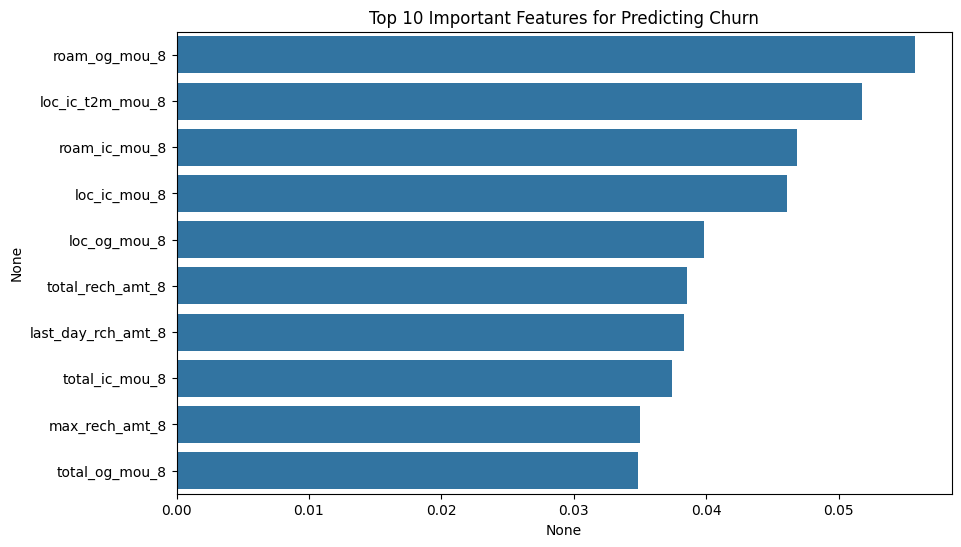

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance from Random Forest
feature_importances = pd.Series(rf_model.feature_importances_, index=df_scaled.columns)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.sort_values(ascending=False)[:10], y=feature_importances.sort_values(ascending=False).index[:10])
plt.title('Top 10 Important Features for Predicting Churn')
plt.show()
